In [1]:
###################### Install all necessary libraries #########################

from google.colab import files
!pip install praw -q
!pip install yfinance --upgrade --no-cache-dir -q
!pip install yahoo_fin -q
!pip install yahoo_fin --upgrade -q
!pip install requests_html -q
!pip install mpld3 -q
!pip install fastapi -q

################################################################################

     |████████████████████████████████| 163kB 7.7MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
     |████████████████████████████████| 6.3MB 15.1MB/s 
     |████████████████████████████████| 81kB 5.1MB/s 
     |████████████████████████████████| 92kB 11.1MB/s 
     |████████████████████████████████| 81kB 10.1MB/s 
     |████████████████████████████████| 81kB 11.4MB/s 
ERROR: pyppeteer 0.2.5 has requirement urllib3<2.0.0,>=1.25.8, but you'll have urllib3 1.24.3 which is incompatible.
     |████████████████████████████████| 153kB 7.7MB/s 
ERROR: requests 2.23.0 has requirement urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you'll have urllib3 1.26.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 890kB 7.9MB/s 
     |████████████████████████████████| 51kB 4.2MB/s 
     |████████████████████████████████| 61kB 8.5MB/s 
     |████████████████████████████████

In [4]:
#########################################  DATA REQUESTS #############################################

# To provide current date and time in an format understandable by our API
from datetime import datetime
from datetime import timedelta

##########################################  DATA MINING ##############################################

import DataMining as get_data
from yahoo_fin.stock_info import get_data as get_val

#######################################  DATA MANIPULATION ###########################################

import pandas as pd
import AnalyzePosts as analyze

#######################################  DATA VISUALIZATION ###########################################

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
from plotly.graph_objs import Scatter3d, Layout, Scene
import plotly


#######################################################################################################


/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.4) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)
aclImdb_v1.tar.gz:   0%|          | 131k/84.1M [00:00<01:06, 1.25MB/s]

downloading aclImdb_v1.tar.gz


aclImdb_v1.tar.gz: 100%|██████████| 84.1M/84.1M [00:01<00:00, 61.0MB/s]


train_data:  17500  test_data:  25000


.vector_cache/glove.6B.zip: 862MB [02:40, 5.39MB/s]                           
100%|█████████▉| 399999/400000 [00:14<00:00, 26716.15it/s]


	Train Loss: 0.691 | Train Acc: 51.73%
	 Val. Loss: 0.668 |  Val. Acc: 63.64%
	Train Loss: 0.674 | Train Acc: 70.12%
	 Val. Loss: 0.585 |  Val. Acc: 74.09%
	Train Loss: 0.634 | Train Acc: 77.55%
	 Val. Loss: 0.493 |  Val. Acc: 76.59%
	Train Loss: 0.580 | Train Acc: 80.09%
	 Val. Loss: 0.438 |  Val. Acc: 79.39%
	Train Loss: 0.524 | Train Acc: 82.91%
	 Val. Loss: 0.405 |  Val. Acc: 81.95%
	Train Loss: 0.475 | Train Acc: 85.36%
	 Val. Loss: 0.389 |  Val. Acc: 83.68%
	Train Loss: 0.431 | Train Acc: 87.02%
	 Val. Loss: 0.384 |  Val. Acc: 85.02%
	Train Loss: 0.396 | Train Acc: 88.20%
	 Val. Loss: 0.378 |  Val. Acc: 85.91%
	Train Loss: 0.365 | Train Acc: 89.08%
	 Val. Loss: 0.387 |  Val. Acc: 86.45%
	Train Loss: 0.340 | Train Acc: 89.85%
	 Val. Loss: 0.392 |  Val. Acc: 87.20%


In [5]:
def CombinedAnalysis_Stocks(stocks, amt, time):
    """
    Get the line plots of top ```amt``` treding stocks for the last ```time``` days.  

    Parameters
    ----------
    stocks : pd.DataFrame
    amt    : int
    time   : int

    Returns
    -------
    Graphs
    """
    ######################## Get the Top ```amt``` values ######################

    try:
      top_stocks = stocks.sort_values('Number_Of_Occurences', ascending=False).head(amt)
    except:
      top_stocks = stocks.head(amt)
    
    ############################ Collect Data and Plot #########################
    
    # Create an empty data Frame to store retreived data
    data_stock = pd.DataFrame(columns=top_stocks.columns)

    for tick in top_stocks['Ticker']:
      tick = tick.replace(" ","")
      try:
        
        # Collect data from yahoo finance function get_data using the stock ticker
        # Use pd.concat to store all data in one DataFrame
        data_stock = pd.concat([get_val(tick,
                              datetime.now() - timedelta(days=time),
                              datetime.date(datetime.now()), 
                              index_as_date=True),data_stock],
                            axis = 0)
      
      except:
        pass
    
    # Plot the line graph of all the stocks togather
    fig = px.line(data_stock, 
                  x=data_stock.index, 
                  y=data_stock['close'], 
                  color="ticker", 
                  title = "Top Trending Stocks Twitter")
    
    fig.update_traces(mode="markers+lines")
    fig.update_xaxes(title="Date")
    fig.update_layout(
        hoverlabel=dict(
          bgcolor="white",
          font_size=16,
          font_family="Rockwell"
          )
    ) 
    plotly.offline.plot(fig, filename='AnalyzeStocks.html')
    # Display result (graph)
    fig.show()
    
    ############################################################################

In [6]:
def Stocks_linePlots(stocks, amt, time):
    """
    Get the line plots of top ```amt``` treding stocks for the last ```time``` days.
    Parameters
    ----------
    stocks : pd.DataFrame
    amt    : int
    time   : int
    Returns
    -------
    Graphs
    """
    ######################## Get the Top ```amt``` values ######################

    try:
        top_stocks = stocks.sort_values('Number_Of_Occurences', ascending=False).head(amt)
    except:
        top_stocks = stocks

        ############################ Collect Data and Plot #########################

    for tick in top_stocks['Ticker']:
        tick = tick.replace(" ", "")
        try:
            # Collect data from yahoo finance function get_data using the stock ticker
            data_stock = get_val(tick,
                                  datetime.now() - timedelta(days=time),
                                  datetime.date(datetime.now()),
                                  index_as_date=True)

            # Start plotting the line graph in plotly.express
            fig = px.line(data_stock,
                          x=data_stock.index,
                          y=data_stock['close'],
                          color="ticker")

            fig.update_traces(mode="markers+lines")
            fig.update_layout(
                hoverlabel=dict(
                    bgcolor="white",
                    font_size=16,
                    font_family="Rockwell"
                ),
                title = tick
            )
            fig.update_xaxes(title=tick)
            plotly.offline.plot(fig, filename='Stocks_linePlots.html')
            # ret_Graph('./IndividualLine.html')
            # Display the result (graph)
            fig.show()
        except:
            pass

    ############################################################################

In [7]:
def Stocks_candlePlots(stocks, amt, time):
    """
    Get the plots of top ```amt``` treding stocks for the last ```time``` days.
    Parameters
    ----------
    stocks : pd.DataFrame
    amt    : int
    time   : int
    Returns
    -------
    Graphs
    """
    ######################## Get the Top ```amt``` values ######################

    try:
        top_stocks = stocks.sort_values('Number_Of_Occurences', ascending=False).head(amt)
    except:
        top_stocks = stocks

    ############################ Collect Data and Plot #########################

    for tick in top_stocks['Ticker']:
        tick = tick.replace(" ", "")
        try:
            # Collect data from yahoo finance function get_data using the stock ticker
            df = get_val(tick,
                          datetime.now() - timedelta(days=time),
                          datetime.date(datetime.now()),
                          index_as_date=True)

            # Start plotting the graphs in plotly.graph.objects
            fig = go.Figure(data=[go.Candlestick(x=df.index,
                                                 open=df['open'],
                                                 high=df['high'],
                                                 low=df['low'],
                                                 close=df['close'])])

            fig.update_layout(
                yaxis_title=tick,
                xaxis_title='Date',
                title = tick
            )
            plotly.offline.plot(fig, filename='Stocks_candlePlots.html')
            # ret_Graph('./IndividualAnalysis.html')
            # Display the result
            fig.show()

        except:
            pass

    ############################################################################

In [8]:
def Popular_Crypto(crypto_data, amt):
    """
    Get the growth rate of most popular ```amt``` crypto's in the last 24h and plot their graphs
    Parameters
    ----------
    crypto_data : pd.DataFrame
    amt         : int
    Returns
    -------
    Graph
    """
    ############################ Collect Data Req ##############################

    popular_crypto_data = crypto_data.sort_values('volume_24', ascending=False).head(amt)

    ################################## Plot 1 ##################################

    ax = plt.subplots(figsize=(13, 7))
    sns.set(style="whitegrid", color_codes=True)
    sns.barplot(data=popular_crypto_data,
                x=popular_crypto_data['Name'],
                y=popular_crypto_data['percent_change_24h'],
                palette="Blues_d",
                label="percent_change_24h")
    plt.xticks(rotation='vertical')
    plt.title('Most Popular Crypto')
    plt.savefig('Popular.png')
    # Display the result
    plt.show()

    ############################################################################

In [9]:
def Growing_Crypto(crypto_data, amt, period):
    """
    Get the top ```amt``` crypto with maximum growth in the last 24h and plot their graphs
    Parameters
    ----------
    crypto_data : pd.DataFrame
    amt         : int
    period      : int
    Returns
    -------
    Graphs
    """
    ########################### Collect Data Req ###############################

    top_crypto_data = crypto_data.sort_values('percent_change_24h' if period == 24 else 'percent_change_7d',
                                              ascending=False).head(amt)

    ################################# Plot 1 ###################################
    f, ax = plt.subplots(figsize=(13, 7))

    if period == 24:
        sns.barplot(data=top_crypto_data,
                    x=top_crypto_data['Name'],
                    y=top_crypto_data['percent_change_24h'],
                    palette="gist_earth",  # YlOrRd_r
                    label="percent_change_24h")
    else:
        sns.barplot(data=top_crypto_data,
                    x=top_crypto_data['Name'],
                    y=top_crypto_data['percent_change_7d'],
                    palette="gist_earth",  # YlOrRd_r
                    label="percent_change_7d")

    plt.xticks(rotation='vertical')
    plt.title('Most Growing Crypto\'s')
    ax.legend(fontsize=14)

    ################################# Plot 2 ###################################

    if period == 24:
        fig = px.bar(top_crypto_data, x='Name', y='percent_change_24h',
                     hover_data=['Name', 'percent_change_24h', 'Price', 'Circulating_Supply', 'Trading_Volume',
                                 'volume_24'],
                     color='Name',
                     labels={'pop': 'Crypto Currencies'},
                     height=500,
                     template='ggplot2', title='Top Crypto\'s')
    else:
        fig = px.bar(top_crypto_data, x='Name', y='percent_change_7d',
                     hover_data=['Name', 'percent_change_7d', 'Price', 'Circulating_Supply', 'Trading_Volume',
                                 'volume_24'],
                     color='Name',
                     labels={'pop': 'Crypto Currencies'},
                     height=500,
                     template='ggplot2', title='Most Growing Crypto\'s')
    plotly.offline.plot(fig, filename='Growing_Crypto.html')
    # ret_Graph('./topCrypto.html')
    return fig.show()

    ############################################################################

In [10]:
def Growing_Crypto_Investable(crypto_data, amt, period):
    """
    Get the top ```amt``` crypto with maximum growth in the last 24h and plot their graphs
    Parameters
    ----------
    crypto_data : pd.DataFrame
    amt         : int
    period      : int
    Returns
    -------
    Graphs
    """
    ########################### Collect Data Req ###############################

    top_crypto_data = crypto_data.sort_values('percent_change_24h' if period == 24 else 'percent_change_7d',
                                              ascending=False).head(amt)

    ################################# Plot 1 ###################################
    f, ax = plt.subplots(figsize=(13, 7))

    if period == 24:
        sns.barplot(data=top_crypto_data,
                    x=top_crypto_data['Name'],
                    y=top_crypto_data['percent_change_24h'],
                    palette="gist_earth",  # YlOrRd_r
                    label="percent_change_24h")
    else:
        sns.barplot(data=top_crypto_data,
                    x=top_crypto_data['Name'],
                    y=top_crypto_data['percent_change_7d'],
                    palette="gist_earth",  # YlOrRd_r
                    label="percent_change_7d")

    plt.xticks(rotation='vertical')
    plt.title('Growing and Investable Crypto\'s')
    ax.legend(fontsize=14)

    ################################# Plot 2 ###################################

    if period == 24:
        fig = px.bar(top_crypto_data, x='Name', y='percent_change_24h',
                     hover_data=['Name', 'percent_change_24h', 'Price', 'Liquidity', 'Circulating_Supply',
                                 'Trading_Volume', 'volume_24'],
                     color='Name',
                     labels={'pop': 'Crypto Currencies'},
                     height=500,
                     template='ggplot2', title='Top Crypto\'s')
    else:
        fig = px.bar(top_crypto_data, x='Name', y='percent_change_7d',
                     hover_data=['Name', 'percent_change_7d', 'Price', 'Liquidity', 'Circulating_Supply',
                                 'Trading_Volume', 'volume_24'],
                     color='Name',
                     labels={'pop': 'Crypto Currencies'},
                     height=500,
                     template='ggplot2', title='Growing and Investable Crypto\'s')
    plotly.offline.plot(fig, filename='Growing_Crypto_Investable.html')
    # ret_Graph('./bestCrypto.html')
    fig.show()

    ############################################################################

In [11]:
def Analyze_Crypto_Data(liquidable, time):
    """
    Represent the Top Most Promising Cryptos in a 3d scatter plot.
    Parameters
    ----------
    liquidable : pd.DataFrame
    time       : int

    Returns
    -------
    Graph
    """
    ############################ Get the Data we require #######################

    liquidable = liquidable.sort_values('percent_change_24h' if time == 24 else 'percent_change_7d',
                                        ascending=False).head(20)

    ############################### Plot 1 #####################################

    fig = px.scatter_3d(liquidable,
                        x='Price',
                        y='Circulating_Supply',
                        z='percent_change_24h' if time == 24 else 'percent_change_7d',
                        color='Name',
                        opacity=0.8,
                        hover_data=['Name', 'Price'],
                        size='Liquidity',
                        title="Most Promising Crypto Currencies",
                        )
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0), template="plotly_dark")
    plotly.offline.plot(fig, filename='my3Dplot1.html')
    # ret_Graph('./my3Dplot1.html')
    fig.show()

    ################################ Plot 2 ####################################

    percent_change, Circulating_Supply, Price = liquidable.percent_change_24h if time == 24 else liquidable.percent_change_7d, liquidable.Circulating_Supply, liquidable.Price

    layout = Layout(scene=Scene(
        xaxis={'title': 'Price'},
        yaxis={'title': 'Circulating Supply'},
        zaxis={'title': 'percent_change'}))

    fig = go.Figure(data=[go.Scatter3d(
        x=Price,
        y=Circulating_Supply,
        z=percent_change,
        mode='markers',
        marker=dict(
            size=8,
            color=Price,
            colorscale='Viridis',
            opacity=0.5
        )
    )], layout=layout)
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    plotly.offline.plot(fig, filename='my3Dplot2.html')
    # ret_Graph('./my3Dplot2.html')
    fig.show()

    ############################################################################

In [12]:
def Analyze_Stocks_Posts(data, parm1, parm2, parm3):
    """
    Plot the effect of social media post using the parameters ```parm1```, ```parm2```, and ```parm3```.
    We use px.scatter_3d() to get the 3-Dimensional Visualization of the growth rate of stocks with
    respect to the number of occurences / number of upvotes.
    Parameters
    ----------
    data  : pd.DataFrame
    parm1 : str
    parm2 : str
    parm3 : str
    
    Returns
    -------
    Graph
    """
    ################################# Plot 1 ###################################
    fig = px.scatter_3d(data.head(10), 
                        x=parm1, 
                        y=parm2, 
                        z=parm3,
                        color=parm2, 
                        opacity=0.8,
                        hover_data = ['Name','Price'], 
                        title = "Most Promising Crypto Currencies",
    )
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0), template = "plotly_dark")
    plotly.offline.plot(fig, filename='Reddit_Stocks.html')
    fig.show()
    
    ############################################################################

In [13]:
def Analyze_Crypto_Posts(data, parm1, parm2, parm3):
    """
    Plot the effect of social media post using the parameters ```parm1```, ```parm2```, and ```parm3```.
    We use px.scatter_3d() to get the 3-Dimensional Visualization of the growth rate of cryptos with
    respect to the number of occurences / number of upvotes.
    Parameters
    ----------
    data  : pd.DataFrame
    parm1 : str
    parm2 : str
    parm3 : str
    
    Returns
    -------
    Graph
    """
    ################################# Plot 1 ###################################

    fig = px.scatter_3d(data.head(10),
                        x=parm1,
                        y=parm2,
                        z=parm3,
                        color=parm2,
                        opacity=0.8,
                        hover_data=['Name', 'Price', 'percent_change_24h'])
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0), template="plotly_dark")
    plotly.offline.plot(fig, filename='Reddit_Crypto.html')
    fig.show()

    ############################################################################

In [14]:
def plot_pie(Stock_Name, pos, neg, neu):
    """
    Parameters
    ----------
    Stock_Name : str
    pos        : int 
    neg        : int
    neu        : int

    Returns
    -------
    Graph
    """
    labels = 'Positive', 'Negative', 'Neutral'
    sizes = [pos,neg, neu]
    
    colors = ( "orange", "cyan", "brown") 
    fig1, ax1 = plt.subplots()
    explode = (0, 0.1, 0) 
    
    ax1.pie(sizes, colors = colors, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
    patches, texts, auto = ax1.pie(sizes, colors=colors, shadow=True, startangle=90,explode=explode, autopct='%1.1f%%' )
    plt.title(Stock_Name)
    plt.legend(patches, labels, loc="best")
    plt.savefig("pie.png")
    plt.show()

# Run analysis on Twitter and Reddit or just Reddit 

In [15]:
# Note: The complete analysis will take a little over 30 mins to complete 
# Due to the extensive time taken by twitter API
complete = True if int(input("Would you like to run the complete Analysis or have a partial run (1, 0) ? ")) == 1 else False

Would you like to run the complete Analysis or have a partial run (1, 0) ? 1


# Stocks Analysis

In [16]:
############################ Establish credentials #############################

# Reddit
client_id, client_secret = 'jA6tGV9IbyEDxg', 'ku7t8VHg5vtp3JMGjuqJmE5ybQhBxA'
username, password = '-betrayer', 'NarutoUzamaki$$$'

# Twitter 
consumer_key, consumer_secret = 'Eoa8hFsMycFYsFyiOEeOW3mpb', 'JHCvRJO8EPe8IDq3wZ9Pcaw6RekSxNtue7KVGpXCz7ZZLSFAty'
access_key, access_secret = '1189932019243003904-85tElnlmswS7Of3dkiIzdImn2J4xiA', '6xt9bsQxlxyBUnR2p71mYYbZ42nDJK7TWCQPeAtsIL5zj'

################################################################################

In [17]:
######################## Get Posts and Tweets for stocks #######################

# Retreive posts from reddit for stocks
reddit_posts = pd.DataFrame()
subreddits_stocks = ["wallstreetbets", "stocks", "investing", "securityanalysis", "StockMarket"]
for subreddit in subreddits_stocks:
    new_data = get_data.Reddit_API(client_id, client_secret, username, password, subreddit, 10000)
    reddit_posts = reddit_posts.append(new_data)

# Retreive tweets from twitter 
if complete:
  df_tweets = get_data.getTweets(consumer_key, consumer_secret, access_key, access_secret, hashtags="#stocks OR #StockToBuy OR #trading OR #stockmarket OR #investing", target_date='2021-04-30', total_tweets = 2500, attempts = 1)

################################################################################

In [18]:
############################### Retreive Stocks Info ###########################
 
stocks = get_data.stocks()
common_words = get_data.Common_words()
top_gainers_today = get_data.Gainers_Or_Losers(1)
top_gainers_today.rename(columns={'ticker': 'Ticker'}, inplace=True)

################################################################################

In [19]:
####################### Analyze Reddit Posts and Tweets ########################

Analysis_reddit = analyze.Analyze_Reddit_Posts(stocks, reddit_posts, common_words)
if complete:
  Analysis_tweets = analyze.Analyze_tweets(stocks,df_tweets, common_words)
  Analysis_tweets = Analysis_tweets.sort_values('Number_Of_Occurences', ascending=False)
  index_names = Analysis_tweets[(Analysis_tweets['Number_Of_Occurences'] >= 10)].index
  Analysis_tweets.drop(index_names, inplace = True)

################################################################################

In [20]:
Analysis_reddit.sort_values('Number_Of_Occurences', ascending=False)

,Stock_Name,Ticker,Number_Of_Occurences,Total_Upvotes,Positive,Negative,Neutral
6,Amazon,AMZN,49,20640.0,15,31,3
134,Tesla,TSLA,46,95601.0,7,32,7
54,Ever,EVK,37,4450.0,0,37,0
137,Twitter,TWTR,37,18128.0,3,25,9
47,Disney,DIS,30,1278.0,2,28,0
...,...,...,...,...,...,...,...
34,Core,CORE,1,1.0,0,1,0
83,Coca,KO,1,9.0,0,1,0
110,Pfizer,PFE,1,14.0,0,1,0
84,Coca,KOF,1,9.0,0,1,0


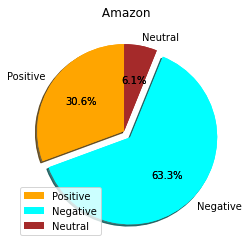

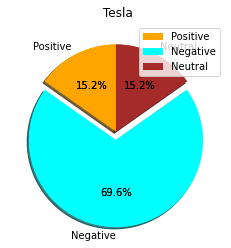

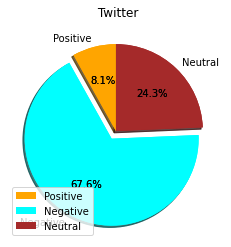

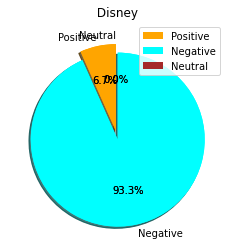

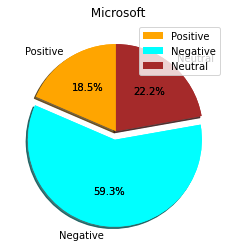

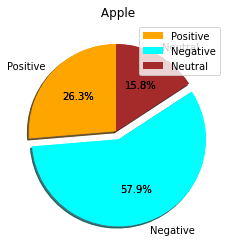

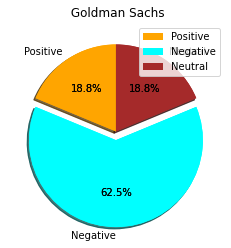

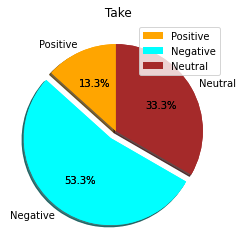

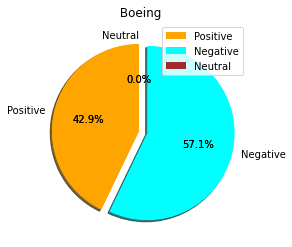

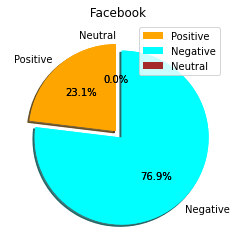

In [21]:
count = 0
for i in Analysis_reddit.sort_values('Number_Of_Occurences', ascending=False).iterrows():
    if i[1]['Positive'] > 1:
      plot_pie(i[1]['Stock_Name'], i[1]['Positive'], i[1]['Negative'], i[1]['Neutral'])
      count += 1
    if count>=10:
      break

In [22]:
########################## Data Visualization ##################################

# Result of Reddit 
CombinedAnalysis_Stocks(Analysis_reddit, 20, 365)
Stocks_candlePlots(Analysis_reddit, 10, 365)

# 3D projection of relation between Occurences / Upvotes vs Price 
# Analyze_Stocks_Posts(Analysis_reddit, 'Price', 'Total_Upvotes', 'Number_Of_Occurences')

# 3D projection of relation between Occurences / Retweets vs Price 
# Analyze_Stocks_Posts(Analysis_tweets, 'Price', 'Total_Retweets', 'Number_Of_Occurences')


In [23]:
# Result of Twitter
if complete:
  CombinedAnalysis_Stocks(Analysis_tweets, 20, 365)
  Stocks_candlePlots(Analysis_tweets, 20, 365)

In [24]:
# Result of Market Performance
CombinedAnalysis_Stocks(top_gainers_today, 10, 30)
Stocks_candlePlots(top_gainers_today, 20, 365)

# CRYPTO'S

In [25]:
######################## Get Posts and Tweets for cryptos ######################

# Retreive posts from reddit for crypto
reddit_crypto = pd.DataFrame()
subreddits_crypto = ["Bitcoinmarkets", "Ethfinance", "CryptoMarkets", "CryptoCurrencyTrading", "ethtrader",
                     "Cryptocurrency", "Crypto_Currency_News", "dogecoin", "Bitcoin", "wallstreetbets"]
for subreddit in subreddits_crypto:
    new_data = get_data.Reddit_API(client_id, client_secret, username, password, subreddit, 10000)
    reddit_crypto = reddit_crypto.append(new_data)
if complete:
  df_tweets_crypto = get_data.getTweets(consumer_key, consumer_secret, access_key, access_secret, hashtags="#crypto OR #cryptocurrency OR #blockchain OR #bitcoin OR #ethereum", target_date='2021-05-2', total_tweets = 2500, attempts = 1)

################################################################################

In [26]:
############################## Get Crypto rates ################################

crypto_data = get_data.CoinBase_Api()
crypto_data = crypto_data[crypto_data.Circulating_Supply > 0]
crypto_data = crypto_data[crypto_data.volume_24 > 200000]
liquidable = get_data.crypto_liquidity(crypto_data)

################################################################################

In [27]:
####################### Analyze Reddit Posts and Tweets ########################

RedditCrypto_Analysis = analyze.Analyze_Reddit_Crypto(crypto_data, reddit_crypto, common_words)
RedditCrypto_Analysis = RedditCrypto_Analysis.sort_values('Number_Of_Occurences', ascending=False)
RedditCrypto_Analysis = pd.merge(left=crypto_data, right=RedditCrypto_Analysis, how='left', left_on='Name', right_on='Name')

if complete:
  tweets_crypto = analyze.Analyze_Tweets_Crypto(crypto_data, df_tweets_crypto, common_words)
  tweets_crypto = pd.merge(left=crypto_data, right=tweets_crypto, how='left', left_on='Name', right_on='Name')

################################################################################

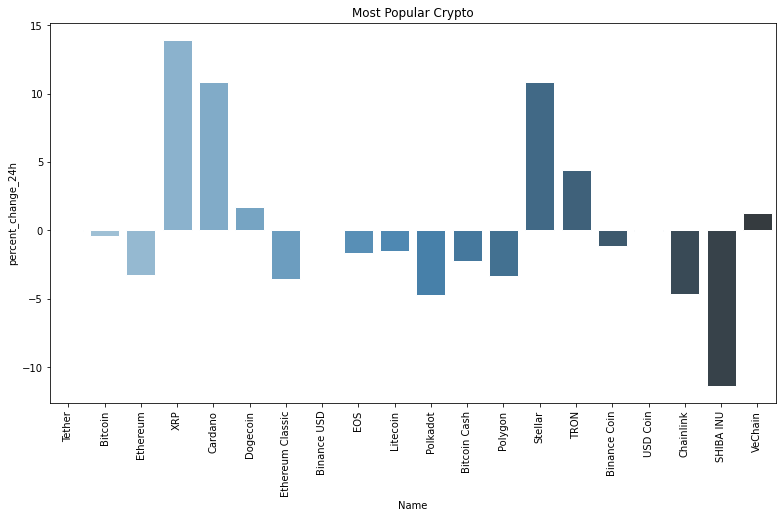

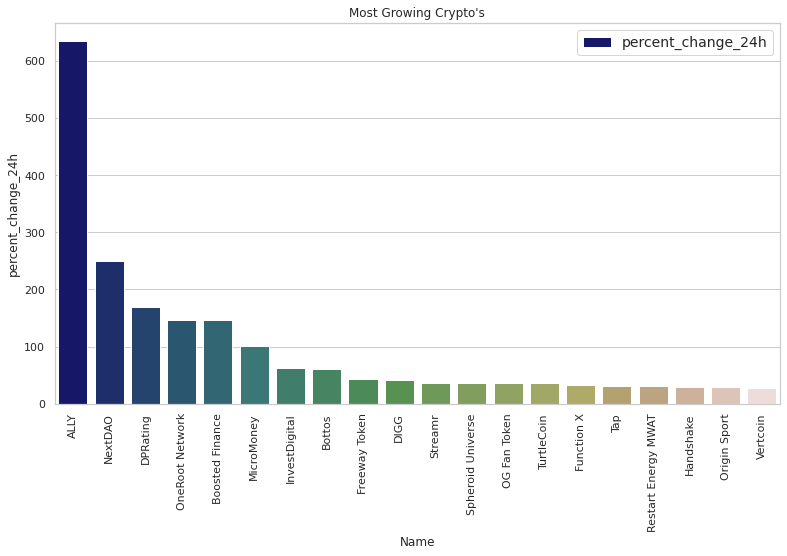

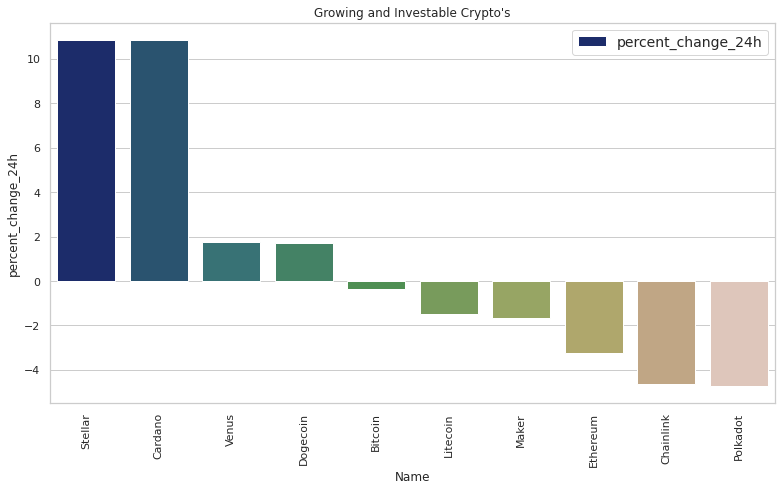

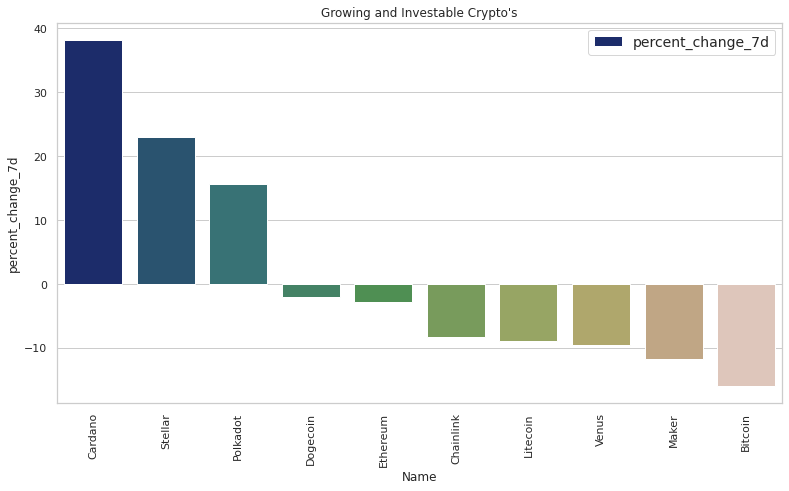

In [28]:
######################### Plot Graphs for Crpyto Analysis #######################

Popular_Crypto(crypto_data=crypto_data, amt=20)
Growing_Crypto(crypto_data=crypto_data, amt=20, period=24)


# Best Crypto's available with highest growth rate in last 24 hours 
Growing_Crypto_Investable(liquidable, 20, 24)

# Best Crypto's available with highest growth rate in last 7 days 
Growing_Crypto_Investable(liquidable, 20, 7)



################################################################################



## 3-D Graphs

In [33]:
# Analyze General Crypto Data
Analyze_Crypto_Data(liquidable, 7)

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:494: DeprecationWarning:

plotly.graph_objs.Scene is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Scene




In [34]:
# Analyze Crypto's based on Reddit Posts
Analyze_Crypto_Posts(RedditCrypto_Analysis, 'Price', 'Total_Upvotes', 'Number_Of_Occurences')

In [35]:
# Analyze Crypto's based on Tweets 
if complete:
  Analyze_Crypto_Posts(tweets_crypto, 'Price', 'Total_Retweets', 'Number_Of_Occurences')

In [36]:
reddit_posts.to_csv("Reddit_Posts.csv")
if complete:
  df_tweets.to_csv("Tweets.csv")

# Analyzing the Data using Linear Regression [ML]

In [37]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader, TensorDataset, random_split
from torch.utils.data import DataLoader

In [38]:
# Get the test data we require and the crypto must be trending 
test_reddit = RedditCrypto_Analysis[['Name', 'Price', 'Total_Upvotes', 'Number_Of_Occurences', 'percent_change_24h','percent_change_7d']]
test_reddit = test_reddit[test_reddit['Number_Of_Occurences']>10]
test_twitter = tweets_crypto[['Name', 'Price', 'Total_Retweets', 'Number_Of_Occurences', 'percent_change_24h','percent_change_7d']]
test_twitter = test_twitter[test_twitter['Number_Of_Occurences']>10]

In [39]:
test_twitter

,Name,Price,Total_Retweets,Number_Of_Occurences,percent_change_24h,percent_change_7d
0,Bitcoin,49163.651665,1193879.0,768.0,-0.371734,-15.958719
1,Ethereum,3862.276816,69171.0,190.0,-3.266115,-2.785873
3,Cardano,2.365170,103882.0,38.0,10.839970,38.205569
4,Dogecoin,0.537738,547585.0,149.0,1.709544,-2.016058
10,Uniswap,38.423956,5266.0,19.0,-5.292406,-3.685718
38,PancakeSwap,29.986248,2504.0,17.0,-2.059748,-18.967102
60,Zilliqa,0.193839,7920.0,18.0,-0.385890,-13.667060
650,Decentr,0.367699,545.0,12.0,1.647410,-3.647770


In [40]:
input_size = 3
output_size = 1
batch_size = 5

In [41]:
categorical_cols = ['Name']
input_cols = ['Total_Retweets', 'Number_Of_Occurences','Price' ]
output_cols = ['percent_change_7d']

In [42]:
def dataframe_to_arrays(dataframe):
    # Make a copy of the original dataframe
    dataframe1 = dataframe.copy(deep=True)
    # Convert non-numeric categorical columns to numbers
    for col in categorical_cols:
        dataframe1[col] = dataframe1[col].astype('category').cat.codes
    # Extract input & outupts as numpy arrays
    inputs_array = dataframe1[input_cols].to_numpy()
    targets_array = dataframe1[output_cols].to_numpy()
    return inputs_array, targets_array

In [43]:
inputs_array, targets_array = dataframe_to_arrays(test_twitter)
inputs_array, targets_array

(array([[1.19387900e+06, 7.68000000e+02, 4.91636517e+04],
        [6.91710000e+04, 1.90000000e+02, 3.86227682e+03],
        [1.03882000e+05, 3.80000000e+01, 2.36517043e+00],
        [5.47585000e+05, 1.49000000e+02, 5.37737898e-01],
        [5.26600000e+03, 1.90000000e+01, 3.84239563e+01],
        [2.50400000e+03, 1.70000000e+01, 2.99862479e+01],
        [7.92000000e+03, 1.80000000e+01, 1.93838639e-01],
        [5.45000000e+02, 1.20000000e+01, 3.67698765e-01]]),
 array([[-15.95871881],
        [ -2.78587289],
        [ 38.20556928],
        [ -2.01605834],
        [ -3.68571834],
        [-18.96710215],
        [-13.66706044],
        [ -3.64776978]]))

In [44]:
inputs = torch.from_numpy(inputs_array).type(torch.float32)
targets = torch.from_numpy(targets_array).type(torch.float32)

In [45]:
dataset = TensorDataset(inputs, targets)

In [46]:
num_rows = len(test_twitter)
val_percent = 0.1756 # between 0.1 and 0.2
val_size = int(num_rows * val_percent)
train_size = num_rows - val_size


train_ds, val_ds = torch.utils.data.random_split(dataset,[train_size,val_size])

In [47]:
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [48]:
class CryptoModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size,output_size)                  # fill this (hint: use input_size & output_size defined above)
        
    def forward(self, xb):
        out = self.linear(xb)                          # fill this
        return out
    
    def training_step(self, batch):
        inputs, targets = batch 
        # Generate predictions
        out = self(inputs)          
        # Calcuate loss
        loss = F.l1_loss(out,targets)                          # fill this
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calculate loss
        loss = F.l1_loss(out,targets)                          # fill this    
        return {'val_loss': loss.detach()}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        # Print result every 20th epoch
        if (epoch+1) % 20 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))

In [51]:
PATH = "./model"

In [52]:
list(model.parameters())

[Parameter containing:
 tensor([[0.0544, 0.0450, 0.5660]], requires_grad=True), Parameter containing:
 tensor([0.1008], requires_grad=True)]

In [53]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

In [72]:
result = evaluate(model,val_loader) # Use the the evaluate function
print(result['val_loss'])

246411.984375


In [64]:
x = int(10000)
count = 0
min = x
while x > 0.1:
  model = CryptoModel()
  if count > 1000000:
    break
  result = evaluate(model,val_loader) # Use the the evaluate function
  x = result['val_loss']
  if x < min:
    torch.save(model.state_dict(), PATH)
    min = x
  count += 1

In [60]:
PATH = "./model"
torch.save(model.state_dict(), PATH)

In [73]:
model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [57]:
def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(input)                # fill this
    prediction = predictions[0].detach()
    print("Input:", input)
    print("Target:", target)
    print("Prediction:", prediction)

In [58]:
type(val_ds)

torch.utils.data.dataset.Subset

In [80]:
input, target = train_ds[6]
predict_single(input, target, model)

Input: tensor([2504.0000,   17.0000,   29.9862])
Target: tensor([-18.9671])
Prediction: tensor(-15.7338)


In [ ]:
model.eval()